# EFC1 GCC253 - Complexidade e Projeto de Algoritmos


> **Prof.: Douglas H. S. Abreu**


**Aluno**: Valter Granato e Vanessa Soares 

**Matricula**: 201920240, 201621392

**Turma**: 10A

Link do repositório GitHub: 

● O trabalho deve ser feito em grupos de no máximo 2 componentes (todos devem enviar a atividade no Campus Virtual)

● Trabalhos entregues após a data limite não serão aceitos

● Data limite de entrega: 26 de Julho de 2022 : 23h55m

● Enviar o trabalho para o campus virtual, do seguinte modo: link do repositório GitHub e do Colab para acesso ao Notebook. A Documentação deve estar no readme

● O trabalho deve ser desenvolvido no modelo Notebook utilizando a linguagem Python

# Importações, Variáveis globais e Funções auxiliares

In [ ]:
import numpy as np

global_1=0

import time
import math
from math import floor
import matplotlib.pyplot as plt
from random import *

def gerarArranjosAleatorios(numeros_aleatorios):
  Aleatorio = np.random.randint(0, 1000, (numeros_aleatorios))
  return Aleatorio

def trocaElementos(vetor, posA, posB):
    aux = vetor[posA]
    vetor[posA] = vetor[posB]
    vetor[posB] = aux

# Funções de Ordenação

> Utilize este espaço para definir as funções de ordenação vista em sala de aula



##  Insertion Sort


In [ ]:
def insertionSort(arranjo):
  qtdeComparacoes = 0
  ini= time.time()

  for j in range (1,len(arranjo)):
    chave=arranjo[j]
    i=j-1
    while i>=0 and arranjo[i]>chave:
      qtdeComparacoes += 1
      arranjo[i+1]=arranjo[i]
      i=i-1
    qtdeComparacoes += 1
    arranjo[i+1]=chave
  fim = time.time()
  tempo_exec=fim-ini

  return tempo_exec,qtdeComparacoes

##  Merge Sort


In [ ]:
def mergeSort(A, p, r, qtdeComparacoes = 0):
    ini= time.time()

    if p < r:
        q = math.floor((p + r)/2)
        retorno = mergeSort(A, p, q, qtdeComparacoes)
        retorno = mergeSort(A, q+1, r, retorno[1])
        qtdeComparacoes = retorno[1]
        qtdeComparacoes = merge(A, p, q+1, r, qtdeComparacoes)
    
    fim = time.time()
    tempo_exec=fim-ini
    return tempo_exec, qtdeComparacoes

def merge(A, p, q, r, qtdeComparacoes):
    inicio1 = p
    fim1 = q
    fim2 = r
    B = []
    
    while (p < fim1 or q <= fim2):
        qtdeComparacoes += 1
        if((p<fim1) and (q > fim2 or A[p] < A[q])):
            B.append(A[p])
            p+=1
        else:
            B.append(A[q])
            q+=1

    i = 0
    while(inicio1+i <= fim2):
        A[inicio1+i] = B[i]
        i+=1
    
    return qtdeComparacoes

##  Selection Sort


In [ ]:
def selectionSort(arranjo):
  n = len(arranjo)
  qtdeComparacoes = 0
  ini= time.time()

  for j in range (n-1):
    min_index = j

    for i in range (j, n):
      qtdeComparacoes += 1
      if arranjo[i] < arranjo[min_index]:
        min_index = i
    
    qtdeComparacoes += 1
    #if arranjo[j] > arranjo[min_index]:
    trocaElementos(arranjo, j, min_index)

  fim = time.time()
  tempo_exec = fim-ini

  return tempo_exec, qtdeComparacoes

##  Bubble Sort


In [ ]:
'''
def bubbleSort(arranjo):
  qtdeComparacoes = 0
  n = len(arranjo)
  ini = time.time()
  for j in range (n-1):
    for i in range (n-1):
      qtdeComparacoes += 1
      if arranjo[i] > arranjo[i+1]:
        trocaElementos(arranjo, i, (i+1))
  fim = time.time()
  tempo_exec = fim-ini  
  return tempo_exec, qtdeComparacoes 
'''
def bubbleSort(arranjo):
  qtdeComparacoes = 0
  n = len(arranjo)
  ini = time.time()
  ordenado = False
  j = 0
  while j < n and ordenado == False:
    ordenado = True
    for i in range (n-1):
      qtdeComparacoes += 1
      if arranjo[i] > arranjo[i+1]:
        ordenado = False
        trocaElementos(arranjo, i, (i+1))
    j += 1
  fim = time.time()
  tempo_exec = fim-ini  
  return tempo_exec, qtdeComparacoes 

Bubble 

Pior caso: Ordem decrescente
Melhor caso: Ordem crescente 

## Heap Sort

In [ ]:
def heapSort(vetor, posFim):
    qtdeComparacoes = 0
    ini= time.time()

    i = int(floor(posFim/2))
    while(i >= 0):
        qtdeComparacoes = criaHeap(vetor, i, posFim, qtdeComparacoes)
        i -= 1

    while(posFim > 0):
        qtdeComparacoes = removeRaiz(vetor, posFim, qtdeComparacoes)
        posFim -= 1

    fim = time.time()
    tempo_exec=fim-ini
    return tempo_exec, qtdeComparacoes;

def criaHeap(vetor, posInicio, posFim, qtdeComparacoes):
    i = posInicio
    while i <= posFim:
        maiorFilho = i * 2 + 1

        #descobre qual dos filhos é o maior
        if maiorFilho <= posFim:
            qtdeComparacoes += 1
            if (maiorFilho + 1 <= posFim) and (vetor[maiorFilho] < vetor[maiorFilho+1]):
                maiorFilho += 1

            #filho é maior que o pai
            qtdeComparacoes += 1
            if vetor[maiorFilho] > vetor[i]:
                trocaElementos(vetor, maiorFilho, i)
                i = maiorFilho
            else:
                i = posFim + 1

        #é uma folha
        else:
            i = posFim + 1

    return qtdeComparacoes
            

def removeRaiz(vetor, posFim, qtdeComparacoes):
    trocaElementos(vetor, 0, posFim)
    criaHeap(vetor, 0, posFim - 1, qtdeComparacoes)
    return qtdeComparacoes

## Quick Sort

> pivo = *A[A-comprimento]*

In [ ]:
def quicksort(vetor, posInicio, posFim, qtdeComparacoes = 0):
    ini= time.time()
    if posInicio < posFim:
        pivo = vetor[posFim]

        i = posInicio
        j = posInicio

        while(j <= posFim):
            qtdeComparacoes += 1
            if vetor[j] <= pivo:
                trocaElementos(vetor, i, j)
                i+=1
            j+=1

        retorno = quicksort(vetor, posInicio, i-2, qtdeComparacoes)
        retorno = quicksort(vetor, i, j-1, retorno[1])
        qtdeComparacoes = retorno[1]

    fim = time.time()
    tempo_exec=fim-ini
    return tempo_exec, qtdeComparacoes

##Quick com pivo aleatório

In [ ]:
def quicksortPivoAl(vetor, posInicio, posFim, qtdeComparacoes = 0):
    ini= time.time()
    if posInicio < posFim:
        #pivo = vetor[posFim]
        posPivo = randint(posInicio, posFim)
        pivo = vetor[posPivo]
        trocaElementos(vetor, posFim, posPivo)

        i = posInicio
        j = posInicio

        while(j <= posFim):
            qtdeComparacoes += 1
            if vetor[j] <= pivo:
                trocaElementos(vetor, i, j)
                i+=1
            j+=1

        retorno = quicksortPivoAl(vetor, posInicio, i-2, qtdeComparacoes)
        retorno = quicksortPivoAl(vetor, i, j-1, retorno[1])
        qtdeComparacoes = retorno[1]

    fim = time.time()
    tempo_exec=fim-ini
    return tempo_exec, qtdeComparacoes

# Testes

## Insertion Sort

In [ ]:
i = 1
while i < 10:
  A = gerarArranjosAleatorios(i)
  n = len(A)
  print('vetor criado: ',str(A))
  ordena = insertionSort(A)
  print('vetor ordenado: ',str(A), "\n")
  i += 1

vetor criado:  [380]
vetor ordenado:  [380] 

vetor criado:  [254 916]
vetor ordenado:  [254 916] 

vetor criado:  [874 457 236]
vetor ordenado:  [236 457 874] 

vetor criado:  [394 377 643 276]
vetor ordenado:  [276 377 394 643] 

vetor criado:  [223 505 562 699 706]
vetor ordenado:  [223 505 562 699 706] 

vetor criado:  [483 709 509 264 320 967]
vetor ordenado:  [264 320 483 509 709 967] 

vetor criado:  [646 753 112 399 947  37 412]
vetor ordenado:  [ 37 112 399 412 646 753 947] 

vetor criado:  [808 774 838 986  95 393 445 596]
vetor ordenado:  [ 95 393 445 596 774 808 838 986] 

vetor criado:  [282  71 944  74 618 704  91 649 164]
vetor ordenado:  [ 71  74  91 164 282 618 649 704 944] 



## Merge Sort

In [ ]:
i = 1
while i < 10:
  A = gerarArranjosAleatorios(i)
  n = len(A)
  print('vetor criado: ',str(A))
  ordena = mergeSort(A, 0, n-1)
  print('vetor ordenado: ',str(A), "\n")
  i += 1


vetor criado:  [78]
vetor ordenado:  [78] 

vetor criado:  [266  10]
vetor ordenado:  [ 10 266] 

vetor criado:  [242 783 846]
vetor ordenado:  [242 783 846] 

vetor criado:  [591  28 312 199]
vetor ordenado:  [ 28 199 312 591] 

vetor criado:  [578 898 526 650 600]
vetor ordenado:  [526 578 600 650 898] 

vetor criado:  [246 282  14 124 879 609]
vetor ordenado:  [ 14 124 246 282 609 879] 

vetor criado:  [885 263 551 930  63 549  29]
vetor ordenado:  [ 29  63 263 549 551 885 930] 

vetor criado:  [376 923 286 592  52 266 696 587]
vetor ordenado:  [ 52 266 286 376 587 592 696 923] 

vetor criado:  [255 818 728 199 739  38 615  91 442]
vetor ordenado:  [ 38  91 199 255 442 615 728 739 818] 



## Selection Sort

In [ ]:
i = 1
while i <= 10:
  vetor = gerarArranjosAleatorios(i)
  print("Vetor cirado : ",str(vetor), " ")
  ordenado = selectionSort(vetor)
  print("Vetor ordenado : ",str(vetor), "\n")
  i += 1

Vetor cirado :  [736]  
Vetor ordenado :  [736] 

Vetor cirado :  [ 79 964]  
Vetor ordenado :  [ 79 964] 

Vetor cirado :  [635 532 606]  
Vetor ordenado :  [532 606 635] 

Vetor cirado :  [943 597  63 943]  
Vetor ordenado :  [ 63 597 943 943] 

Vetor cirado :  [621 428 161 683 423]  
Vetor ordenado :  [161 423 428 621 683] 

Vetor cirado :  [177 398 165 622 183  50]  
Vetor ordenado :  [ 50 165 177 183 398 622] 

Vetor cirado :  [550 684 679 581 611 370 708]  
Vetor ordenado :  [370 550 581 611 679 684 708] 

Vetor cirado :  [656 206 597 132 173 256 101 252]  
Vetor ordenado :  [101 132 173 206 252 256 597 656] 

Vetor cirado :  [197  71 612 423 738 260 509 365 376]  
Vetor ordenado :  [ 71 197 260 365 376 423 509 612 738] 

Vetor cirado :  [756 557 145 529  11 615 238 936 899 572]  
Vetor ordenado :  [ 11 145 238 529 557 572 615 756 899 936] 



## Bubble Sort

In [ ]:
i = 1
while i <= 10:
  vetor = gerarArranjosAleatorios(i)
  print("Vetor criado: ",str(vetor), " ")
  saida = bubbleSort(vetor)
  print("Vetor ordenado: ",str(vetor), "\n")
  i += 1

Vetor criado:  [968]  
Vetor ordenado:  [968] 

Vetor criado:  [625 620]  
Vetor ordenado:  [620 625] 

Vetor criado:  [183 205 537]  
Vetor ordenado:  [183 205 537] 

Vetor criado:  [465 191 938 512]  
Vetor ordenado:  [191 465 512 938] 

Vetor criado:  [710 471 494 772 188]  
Vetor ordenado:  [188 471 494 710 772] 

Vetor criado:  [ 55 631 562 409 549 572]  
Vetor ordenado:  [ 55 409 549 562 572 631] 

Vetor criado:  [ 48  21 153 592 897   5 491]  
Vetor ordenado:  [  5  21  48 153 491 592 897] 

Vetor criado:  [ 44 732 885 125 628 605 151 208]  
Vetor ordenado:  [ 44 125 151 208 605 628 732 885] 

Vetor criado:  [210 218 234 134 151 780 573 507 628]  
Vetor ordenado:  [134 151 210 218 234 507 573 628 780] 

Vetor criado:  [641 550 549 925 743 670 827 317 531 879]  
Vetor ordenado:  [317 531 549 550 641 670 743 827 879 925] 



## Quick Sort

In [ ]:
i = 1
while i <= 10:
  vetor = gerarArranjosAleatorios(i)
  print("Vetor criado: ",str(vetor))
  quicksort(vetor, 0, i-1)
  print("Vetor ordenado: ",str(vetor), "\n")
  i += 1

Vetor criado:  [279]
Vetor ordenado:  [279] 

Vetor criado:  [690 522]
Vetor ordenado:  [522 690] 

Vetor criado:  [699 300  31]
Vetor ordenado:  [ 31 300 699] 

Vetor criado:  [666 410 395 477]
Vetor ordenado:  [395 410 477 666] 

Vetor criado:  [769  75 730 104 949]
Vetor ordenado:  [ 75 104 730 769 949] 

Vetor criado:  [254 579  33 604 493  55]
Vetor ordenado:  [ 33  55 254 493 579 604] 

Vetor criado:  [285 948 585 162 737  86 514]
Vetor ordenado:  [ 86 162 285 514 585 737 948] 

Vetor criado:  [ 51 273 413 905 897 375 387 342]
Vetor ordenado:  [ 51 273 342 375 387 413 897 905] 

Vetor criado:  [418 480  50 827  87 864 787  81 502]
Vetor ordenado:  [ 50  81  87 418 480 502 787 827 864] 

Vetor criado:  [511 717 335  44 833 893 284 670  38 995]
Vetor ordenado:  [ 38  44 284 335 511 670 717 833 893 995] 



##Heap Sort

Este algoritmo depende de uma Heap. Como a Heap é uma árvore binária e para monta-lá compara-se todos os elementos do vetor, a complexidade desse algoritmo é de O(n * log n)

In [ ]:
i = 1
while i <= 10:
  vetor = gerarArranjosAleatorios(i)
  print("Vetor criado: ",str(vetor))
  heapSort(vetor, i-1)
  print("Vetor ordenado: ",str(vetor), "\n")
  i += 1

Vetor criado:  [154]
Vetor ordenado:  [154] 

Vetor criado:  [884  30]
Vetor ordenado:  [ 30 884] 

Vetor criado:  [158 376 326]
Vetor ordenado:  [158 326 376] 

Vetor criado:  [933 666 664 779]
Vetor ordenado:  [664 666 779 933] 

Vetor criado:  [752 818 296 280 534]
Vetor ordenado:  [280 296 534 752 818] 

Vetor criado:  [ 61 404 858 928 485 239]
Vetor ordenado:  [ 61 239 404 485 858 928] 

Vetor criado:  [250  31 621 677 502 877 610]
Vetor ordenado:  [ 31 250 502 610 621 677 877] 

Vetor criado:  [ 10 671  75  97 603  64   2 658]
Vetor ordenado:  [  2  10  64  75  97 603 658 671] 

Vetor criado:  [ 58 727 963 131 298 933 978 205 608]
Vetor ordenado:  [ 58 131 205 298 608 727 933 963 978] 

Vetor criado:  [160  61 384  50 976 849 590 341 281 746]
Vetor ordenado:  [ 50  61 160 281 341 384 590 746 849 976] 



##Quick Sort com pivo aleatório

In [ ]:
i = 1
while i <= 10:
  vetor = gerarArranjosAleatorios(i)
  print("Vetor criado: ",str(vetor))
  quicksortPivoAl(vetor, 0, i-1)
  print("Vetor ordenado: ",str(vetor), "\n")
  i += 1

Vetor criado:  [893]
Vetor ordenado:  [893] 

Vetor criado:  [590 439]
Vetor ordenado:  [439 590] 

Vetor criado:  [118 995 554]
Vetor ordenado:  [118 554 995] 

Vetor criado:  [487 558 115 761]
Vetor ordenado:  [115 487 558 761] 

Vetor criado:  [733 495 776 693  34]
Vetor ordenado:  [ 34 495 693 733 776] 

Vetor criado:  [159 451 434 756 120 275]
Vetor ordenado:  [120 159 275 434 451 756] 

Vetor criado:  [966 712 591 297 241 579 669]
Vetor ordenado:  [241 297 579 591 669 712 966] 

Vetor criado:  [438 875   5 254 210  12 820 696]
Vetor ordenado:  [  5  12 210 254 438 696 820 875] 

Vetor criado:  [472 461 615 328 922 832 306 693 858]
Vetor ordenado:  [306 328 461 472 615 693 832 858 922] 

Vetor criado:  [771 838 696 990 869 953 570  60 166 113]
Vetor ordenado:  [ 60 113 166 570 696 771 838 869 953 990] 



# Questões



1.   Dado um conjunto de arranjos ***A[5,...,1000, passo=5]***

> a) Defina o melhor e pior caso para cada um dos algoritmos definidos acima, crie vetores ***A*** para estes casos e faça a comparação gráficamente também com casos aleatórios (plote um gráfico para cada algoritmo). Conte o numero de comparações realzizadas para cada uma das execuções.

> b) Repita o procedimento acima. Porém compare os algoritmos para pior e melhor caso e também casos aleatórios.

> c) Qual é o comportamento assintótico para cada um dos algorítmos acima (melhor caso e pior caso, se puder, analise também em casos aleatórios)



**Obs.:** para os algoritmos QuickSort e Merge Sort mostre apenas um melhor e um pior caso. faça a comparação com os demais métodos com o conjunto ***A*** apenas em casos aleatórios.





2.   Desenvolda uma versão aleatorizada do QUICKSORT (pivo aleatório) e compare com a versão apresentada em sala de aula e definida acima.



# Desempenho

## Insertion Sort

O algoritmo vai comparar cada elemento com os seus antecessores para realizar a ordenação.

No pior caso, o arranjo estará inversamente ordenado e cada elemento selecionado será comparado com TODOS os elementos anteriores. Nesse caso, a compleidade será de O(n²) por conta dessa comparação com todos os elementos anteriores para cada elemento

No melhor caso, o arranjo já está ordenado e para cada elemento será feita apenas a comparação com o seu anterior. Nessa caso, a complexidade é de Ω(n)





Desempenho por tempo:


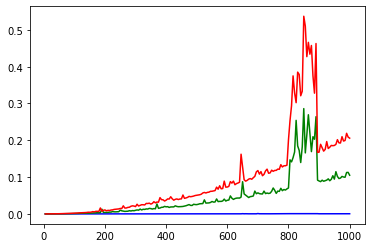


Desempenho por número de comparações:


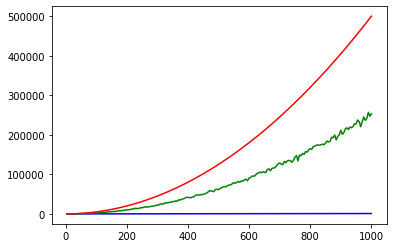

In [ ]:
qtdeCasos = []
resultMelhorCasoTempo = []
resultCasoMedioTempo = []
resultPiorCasoTempo = []
resultMelhorCasoComparacoes = []
resultCasoMedioComparacoes = []
resultPiorCasoComparacoes = []

i = 5
while (i <= 1000):
  qtdeCasos.append(i)

  #melhor caso
  Array=np.arange(i)
  ordena=insertionSort(Array)
  resultMelhorCasoTempo.append(ordena[0])
  resultMelhorCasoComparacoes.append(ordena[1])

  #caso médio
  Array= gerarArranjosAleatorios(i)
  ordena=insertionSort(Array)
  resultCasoMedioTempo.append(ordena[0])
  resultCasoMedioComparacoes.append(ordena[1])

  #pior caso
  Array=np.arange(i, 0, -1)
  ordena=insertionSort(Array)
  resultPiorCasoTempo.append(ordena[0])
  resultPiorCasoComparacoes.append(ordena[1])

  i += 5

#plota gráfico pelo tempo
print("Desempenho por tempo:")
plt.plot(qtdeCasos, resultMelhorCasoTempo, color = 'blue')
plt.plot(qtdeCasos, resultCasoMedioTempo, color = 'green')
plt.plot(qtdeCasos, resultPiorCasoTempo, color = 'red')

plt.show()

#plota gráfico pelo numero de comparações
print("\nDesempenho por número de comparações:")
plt.plot(qtdeCasos, resultMelhorCasoComparacoes, color = 'blue')
plt.plot(qtdeCasos, resultCasoMedioComparacoes, color = 'green')
plt.plot(qtdeCasos, resultPiorCasoComparacoes, color = 'red')

plt.show()

## Merge Sort

O merge sort trabalha com dividir e conquistar. Esse algoritmo divide o arranjo em arranjos menores e realiza a ordenação por meio de intercalação.

Numa intercalação com n elementos, todos os elementos serão comparados. Portanto, a intercalação term complexidade θ(n)

Na divisão, o arranjo de tamanho n será dividido em
em 2, e as partes também serão divididas por 2, até que cada parte tenha no máximo 2 elementos Sendo assim, podemos dizer que a complexidade dessa divisão é de θ(log n)

Considerando que a intercalação é realizada em todas partes que foram divididas, a complexidade do algoritmo é de θ(n * log n)

Como a divisão e a intercalação é realizada da mesma maneira, independente da ordem dos elementos do arranjo, a complexidade do caso médio, melhor caso e pior caso é sempre a mesma

Desempenho por tempo:


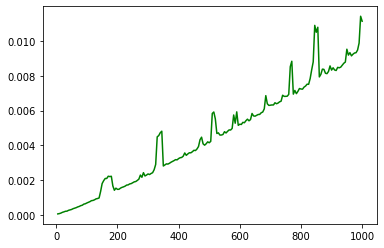


Desempenho por número de comparações:


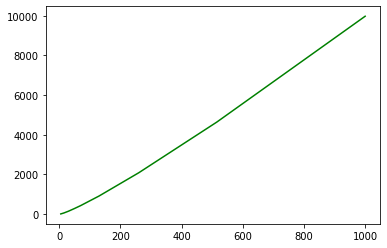

In [ ]:
qtdeCasos = []
resultCasoMedioTempo = []
resultCasoMedioComparacoes = []

i = 5
while (i <= 1000):
  qtdeCasos.append(i)

  #caso médio
  Array= gerarArranjosAleatorios(i)
  ordena=mergeSort(Array, 0, i-1)
  resultCasoMedioTempo.append(ordena[0])
  resultCasoMedioComparacoes.append(ordena[1])

  i += 5

#plota gráfico pelo tempo
print("Desempenho por tempo:")
plt.plot(qtdeCasos, resultCasoMedioTempo, color = 'green')

plt.show()

#plota gráfico pelo numero de comparações
print("\nDesempenho por número de comparações:")
plt.plot(qtdeCasos, resultCasoMedioComparacoes, color = 'green')

plt.show()

#o merge sort não tem melhor ou pior caso. O custo x será o mesmo
#para todos os vetores com n elementos

##Selection Sort

Para cada posição do arranjo, o algoritmo verifica todos os elementos a partir da posição atual em busca do menor elemento. Sendo assim sua complexidade é de θ(n²). Como essa verificação ocorre sempre da mesma maneira, independente de como os elementos estão organizados no arranjo, o pior caso, o cas médio e o melhor caso tem o mesmo desempenho

Desempenho por tempo:


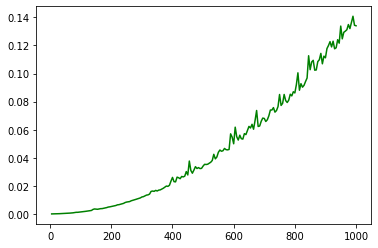


Desempenho por número de comparações:


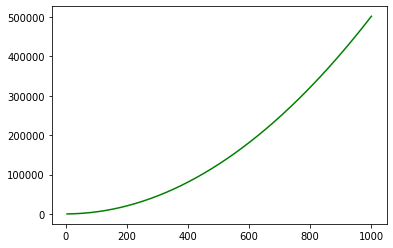

In [ ]:
qtdeCasos = []
resultCasoMedioTempo = []
resultCasoMedioComparacoes = []

i = 5
while (i <= 1000):
  qtdeCasos.append(i)

  #caso médio
  Array= gerarArranjosAleatorios(i)
  ordena=selectionSort(Array)
  resultCasoMedioTempo.append(ordena[0])
  resultCasoMedioComparacoes.append(ordena[1])

  i += 5

#plota gráfico pelo tempo
print("Desempenho por tempo:")
plt.plot(qtdeCasos, resultCasoMedioTempo, color = 'green')

plt.show()

#plota gráfico pelo numero de comparações
print("\nDesempenho por número de comparações:")
plt.plot(qtdeCasos, resultCasoMedioComparacoes, color = 'green')

plt.show()

#O selection sort realiza o mesmo número de comparações para todos os
#vetores de tamanho n, portanto o custo para todos os vetores de
#tamanho n será o mesmo

##Bubble Sort

Com o arranjo inversamente ordenado, o algoritmo vai percorrer o vetor n vezes, "arrastando" os maiores elementos para o final do arranjo. Como o algoritmo compara todos os elementos a cada percorrimento, a complexidade no pior caso é de O(n²)

Se o arranjo estiver ordenado, o algoritmo só percorre o arranjo uma única vez. Portanto, no melhor dos casos a complexidade é Ω(n)

Desempenho por tempo:


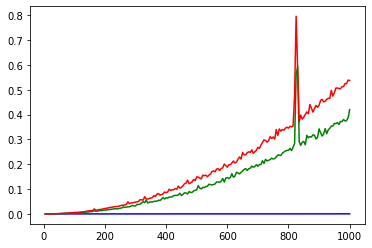


Desempenho por número de comparações:


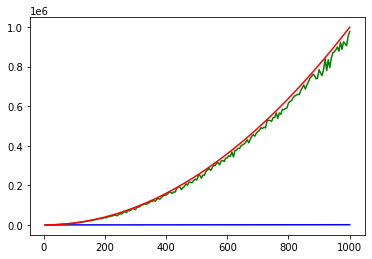

In [ ]:
qtdeCasos = []
resultMelhorCasoTempo = []
resultCasoMedioTempo = []
resultPiorCasoTempo = []
resultMelhorCasoComparacoes = []
resultCasoMedioComparacoes = []
resultPiorCasoComparacoes = []

i = 5
while (i <= 1000):
  qtdeCasos.append(i)

  #melhor caso
  Array=np.arange(i)
  ordena=bubbleSort(Array)
  resultMelhorCasoTempo.append(ordena[0])
  resultMelhorCasoComparacoes.append(ordena[1])

  #caso médio
  Array= gerarArranjosAleatorios(i)
  ordena=bubbleSort(Array)
  resultCasoMedioTempo.append(ordena[0])
  resultCasoMedioComparacoes.append(ordena[1])

  #pior caso
  Array=np.arange(i, 0, -1)
  ordena=bubbleSort(Array)
  resultPiorCasoTempo.append(ordena[0])
  resultPiorCasoComparacoes.append(ordena[1])

  i += 5

#plota gráfico pelo tempo
print("Desempenho por tempo:")
plt.plot(qtdeCasos, resultMelhorCasoTempo, color = 'blue')
plt.plot(qtdeCasos, resultCasoMedioTempo, color = 'green')
plt.plot(qtdeCasos, resultPiorCasoTempo, color = 'red')

plt.show()

#plota gráfico pelo numero de comparações
print("\nDesempenho por número de comparações:")
plt.plot(qtdeCasos, resultMelhorCasoComparacoes, color = 'blue')
plt.plot(qtdeCasos, resultCasoMedioComparacoes, color = 'green')
plt.plot(qtdeCasos, resultPiorCasoComparacoes, color = 'red')

plt.show()

#o melhor caso é ordenado de forma crescente
# o medio caso é ordenado de qualquer jeito
# o pior caso é ordenado de forma descrescente 

##Heap Sort

Desempenho por tempo:


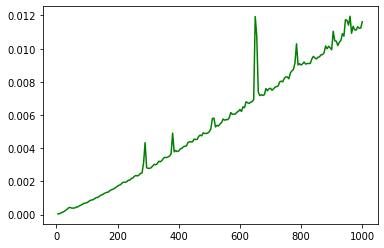


Desempenho por número de comparações:


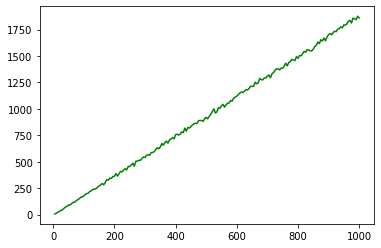

In [ ]:
qtdeCasos = []
resultCasoMedioTempo = []
resultCasoMedioComparacoes = []

i = 5
while i <= 1000:
  qtdeCasos.append(i)

  #caso médio
  Array= gerarArranjosAleatorios(i)
  resultado=heapSort(Array, i-1)
  resultCasoMedioTempo.append(resultado[0])
  resultCasoMedioComparacoes.append(resultado[1])
  i += 5 

#plota gráfico pelo tempo
print("Desempenho por tempo:")
plt.plot(qtdeCasos, resultCasoMedioTempo, color = 'green')
plt.show()

#plota gŕafico pelo número de comparações
print("\nDesempenho por número de comparações:")
plt.plot(qtdeCasos, resultCasoMedioComparacoes, color = 'green')
plt.show()

#o melhor caso, pior caso e caso médio são práticamente iguais

##Quick Sort

Esse algoritmo divide o arranjo em 2 diversas vezes, com os elementos menores que o pivo em uma parte e os elementos maiores que o pivo em uma segunda parte.

Se o pivo escolhido sempre dividir o arranjo em duas partes iguais, teremos o melhor caso com a complexidade de Ω(n * log n).

Caso o pivo escolhido seja sempre o maior ou o menor elemento do arranjo, um dos arranjos gerados pela divisão ser vazio. Nesse caso, temos o pior caso com a complexidade de O(n²)

Desempenho por tempo:


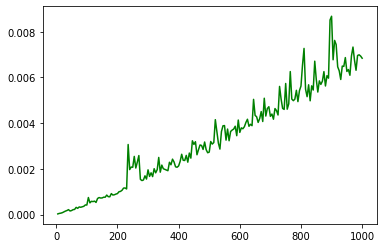

Melhor Caso: 1.7404556274414062e-05
Pior Caso: 4.5299530029296875e-05

Desempenho por número de comparações:


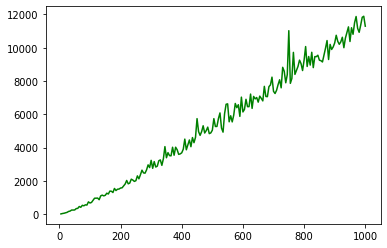

Melhor Caso: 32
Pior Caso: 65


In [ ]:
qtdeCasos = []
resultCasoMedioTempo = []
resultCasoMedioComparacoes = []

i = 5
while i <= 1000:
  qtdeCasos.append(i)

  #caso médio
  Array= gerarArranjosAleatorios(i)
  resultado=quicksort(Array, 0, i-1)
  resultCasoMedioTempo.append(resultado[0])
  resultCasoMedioComparacoes.append(resultado[1])
  i += 5 

#plota gráfico pelo tempo
print("Desempenho por tempo:")
plt.plot(qtdeCasos, resultCasoMedioTempo, color = 'green')
plt.show()

vetPiorCaso = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
vetMelhorCaso = [0, 1, 3, 4, 2, 6, 7, 9, 10, 8, 5]

resulPiorCaso = quicksort(vetPiorCaso, 0, 10)
resulMelhorCaso = quicksort(vetMelhorCaso, 0, 10)

print("Melhor Caso: " + str(resulMelhorCaso[0]))
print("Pior Caso: " + str(resulPiorCaso[0]) + "\n")


#plota gŕafico pelo número de comparações
print("Desempenho por número de comparações:")
plt.plot(qtdeCasos, resultCasoMedioComparacoes, color = 'green')
plt.show()

print("Melhor Caso: " + str(resulMelhorCaso[1]))
print("Pior Caso: " + str(resulPiorCaso[1]))

#o pior caso do quick sort é quando o vetor está ordenado
#o melhor caso do quick sort é quando o pivo já está no meio do vetor

##Comparando Piores Casos

QuickSort está disparando o erro

RecursionError: maximum recursion depth exceeded while calling a Python object

Por isso foi retirado da comparação

Comparação por tempo


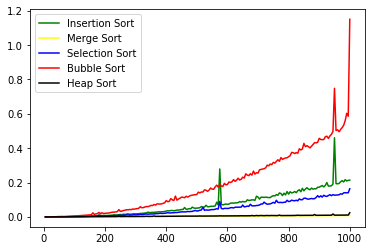

Comparação por número de comparações


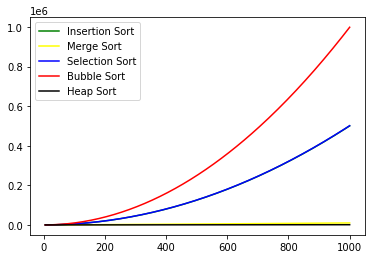

In [ ]:
insertionTempo = []
insertionComparacoes = []
mergeTempo = []
mergeComparacoes = []
selectionTempo = []
selectionComparacoes = []
bubbleTempo = []
bubbleComparacoes = []
heapTempo = []
heapComparacoes = []
quickTempo = []
quickComparacoes = []
casos = []

i = 5
while i <= 1000:
  casos.append(i)

  Array=np.arange(i, 0, -1)

  ordena=insertionSort(Array.copy())
  insertionTempo.append(ordena[0])
  insertionComparacoes.append(ordena[1])
  
  ordena=mergeSort(Array.copy(), 0, i-1)
  mergeTempo.append(ordena[0])
  mergeComparacoes.append(ordena[1])
  
  ordena=selectionSort(Array.copy())
  selectionTempo.append(ordena[0])
  selectionComparacoes.append(ordena[1])

  ordena=bubbleSort(Array.copy())
  bubbleTempo.append(ordena[0])
  bubbleComparacoes.append(ordena[1])

  ordena=heapSort(Array.copy(), i-1)
  heapTempo.append(ordena[0])
  heapComparacoes.append(ordena[1])
  '''
  ordena=quicksort(Array.copy(), 0, i-1)
  quickTempo.append(ordena[0])
  quickComparacoes.append(ordena[1])
  '''
  i += 5

print("Comparação por tempo")
plt.plot(qtdeCasos, insertionTempo, color = 'green', label='Insertion Sort')
plt.plot(qtdeCasos, mergeTempo, color = 'yellow', label='Merge Sort')
plt.plot(qtdeCasos, selectionTempo, color = 'blue', label='Selection Sort')
plt.plot(qtdeCasos, bubbleTempo, color = 'red', label='Bubble Sort')
plt.plot(qtdeCasos, heapTempo, color = 'black', label='Heap Sort')
#plt.plot(qtdeCasos, quickTempo, color = 'purple', label='Quick Sort')
plt.legend()
plt.show()

print("Comparação por número de comparações")
plt.plot(qtdeCasos, insertionComparacoes, color = 'green', label='Insertion Sort')
plt.plot(qtdeCasos, mergeComparacoes, color = 'yellow', label='Merge Sort')
plt.plot(qtdeCasos, selectionComparacoes, color = 'blue', label='Selection Sort')
plt.plot(qtdeCasos, bubbleComparacoes, color = 'red', label='Bubble Sort')
plt.plot(qtdeCasos, heapComparacoes, color = 'black', label='Heap Sort')
#plt.plot(qtdeCasos, quickComparacoes, color = 'purple', label='Quick Sort')
plt.legend()
plt.show()

#RecursionError: maximum recursion depth exceeded while calling a Python object

## Comparando Casos Médios

Comparação por tempo


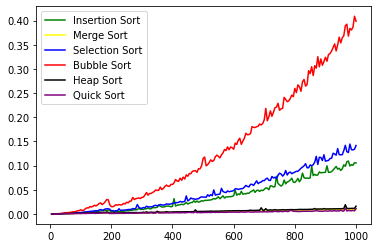

Comparação por número de comparações


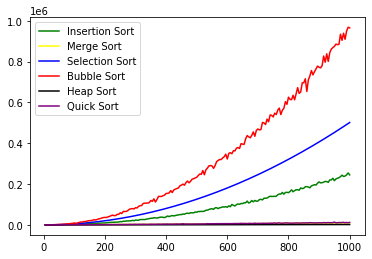

In [ ]:
insertionTempo = []
insertionComparacoes = []
mergeTempo = []
mergeComparacoes = []
selectionTempo = []
selectionComparacoes = []
bubbleTempo = []
bubbleComparacoes = []
heapTempo = []
heapComparacoes = []
quickTempo = []
quickComparacoes = []
casos = []

i = 5
while i <= 1000:
  casos.append(i)

  Array=gerarArranjosAleatorios(i)

  ordena=insertionSort(Array.copy())
  insertionTempo.append(ordena[0])
  insertionComparacoes.append(ordena[1])
  
  ordena=mergeSort(Array.copy(), 0, i-1)
  mergeTempo.append(ordena[0])
  mergeComparacoes.append(ordena[1])
  
  ordena=selectionSort(Array.copy())
  selectionTempo.append(ordena[0])
  selectionComparacoes.append(ordena[1])

  ordena=bubbleSort(Array.copy())
  bubbleTempo.append(ordena[0])
  bubbleComparacoes.append(ordena[1])

  ordena=heapSort(Array.copy(), i-1)
  heapTempo.append(ordena[0])
  heapComparacoes.append(ordena[1])

  ordena=quicksort(Array.copy(), 0, i-1)
  quickTempo.append(ordena[0])
  quickComparacoes.append(ordena[1])

  i += 5

print("Comparação por tempo")
plt.plot(qtdeCasos, insertionTempo, color = 'green', label='Insertion Sort')
plt.plot(qtdeCasos, mergeTempo, color = 'yellow', label='Merge Sort')
plt.plot(qtdeCasos, selectionTempo, color = 'blue', label='Selection Sort')
plt.plot(qtdeCasos, bubbleTempo, color = 'red', label='Bubble Sort')
plt.plot(qtdeCasos, heapTempo, color = 'black', label='Heap Sort')
plt.plot(qtdeCasos, quickTempo, color = 'purple', label='Quick Sort')
plt.legend()
plt.show()

print("Comparação por número de comparações")
plt.plot(qtdeCasos, insertionComparacoes, color = 'green', label='Insertion Sort')
plt.plot(qtdeCasos, mergeComparacoes, color = 'yellow', label='Merge Sort')
plt.plot(qtdeCasos, selectionComparacoes, color = 'blue', label='Selection Sort')
plt.plot(qtdeCasos, bubbleComparacoes, color = 'red', label='Bubble Sort')
plt.plot(qtdeCasos, heapComparacoes, color = 'black', label='Heap Sort')
plt.plot(qtdeCasos, quickComparacoes, color = 'purple', label='Quick Sort')
plt.legend()
plt.show()

##Comparando Melhores Casos

QuickSort não foi incluido nessa comparação por conta da complexidade para simular o melhor caso desse algoritmo

Comparação por tempo


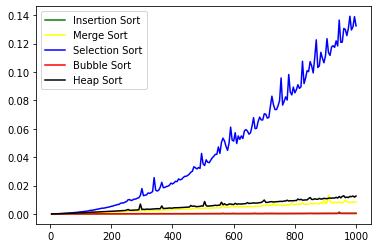

Comparação por número de comparações


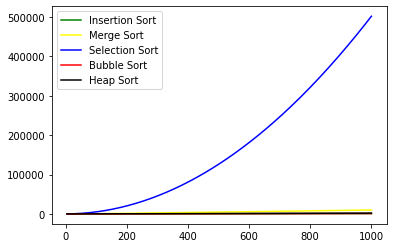

In [ ]:
insertionTempo = []
insertionComparacoes = []
mergeTempo = []
mergeComparacoes = []
selectionTempo = []
selectionComparacoes = []
bubbleTempo = []
bubbleComparacoes = []
heapTempo = []
heapComparacoes = []
quickTempo = []
quickComparacoes = []
casos = []

i = 5
while i <= 1000:
  casos.append(i)

  Array=Array=np.arange(i)

  ordena=insertionSort(Array.copy())
  insertionTempo.append(ordena[0])
  insertionComparacoes.append(ordena[1])
  
  ordena=mergeSort(Array.copy(), 0, i-1)
  mergeTempo.append(ordena[0])
  mergeComparacoes.append(ordena[1])
  
  ordena=selectionSort(Array.copy())
  selectionTempo.append(ordena[0])
  selectionComparacoes.append(ordena[1])

  ordena=bubbleSort(Array.copy())
  bubbleTempo.append(ordena[0])
  bubbleComparacoes.append(ordena[1])

  ordena=heapSort(Array.copy(), i-1)
  heapTempo.append(ordena[0])
  heapComparacoes.append(ordena[1])

  i += 5

print("Comparação por tempo")
plt.plot(qtdeCasos, insertionTempo, color = 'green', label='Insertion Sort')
plt.plot(qtdeCasos, mergeTempo, color = 'yellow', label='Merge Sort')
plt.plot(qtdeCasos, selectionTempo, color = 'blue', label='Selection Sort')
plt.plot(qtdeCasos, bubbleTempo, color = 'red', label='Bubble Sort')
plt.plot(qtdeCasos, heapTempo, color = 'black', label='Heap Sort')
plt.legend()
plt.show()

print("Comparação por número de comparações")
plt.plot(qtdeCasos, insertionComparacoes, color = 'green', label='Insertion Sort')
plt.plot(qtdeCasos, mergeComparacoes, color = 'yellow', label='Merge Sort')
plt.plot(qtdeCasos, selectionComparacoes, color = 'blue', label='Selection Sort')
plt.plot(qtdeCasos, bubbleComparacoes, color = 'red', label='Bubble Sort')
plt.plot(qtdeCasos, heapComparacoes, color = 'black', label='Heap Sort')
plt.legend()
plt.show()

##Comparação de Quick Sort

Desempenho por tempo:


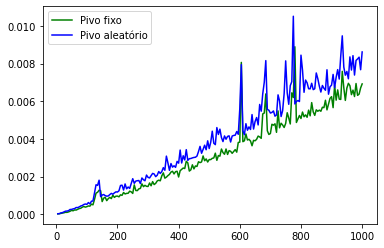

Desempenho por número de comparações:


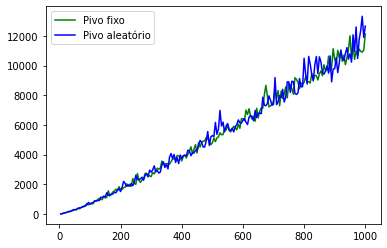

In [ ]:
qtdeCasos = []
quickNormalTempo = []
quickPivoAleatorioTempo = []
quickNormalComparacoes = []
quickPivoAleatorioComparacoes = []

i = 5
while i <= 1000:
  qtdeCasos.append(i)

  Array= gerarArranjosAleatorios(i)

  resultado=quicksort(Array.copy(), 0, i-1)
  quickNormalTempo.append(resultado[0])
  quickNormalComparacoes.append(resultado[1])

  resultado = quicksortPivoAl(Array.copy(), 0, i-1)
  quickPivoAleatorioTempo.append(resultado[0])
  quickPivoAleatorioComparacoes.append(resultado[1])

  i += 5 

#plota gráfico pelo tempo
print("Desempenho por tempo:")
plt.plot(qtdeCasos, quickNormalTempo, color = 'green', label='Pivo fixo')
plt.plot(qtdeCasos, quickPivoAleatorioTempo, color = 'blue', label='Pivo aleatório')
plt.legend()

plt.show()

#plota gŕafico pelo número de comparações
print("Desempenho por número de comparações:")
plt.plot(qtdeCasos, quickNormalComparacoes, color = 'green', label='Pivo fixo')
plt.plot(qtdeCasos, quickPivoAleatorioComparacoes, color = 'blue', label='Pivo aleatório')
plt.legend()

plt.show()